In [1]:
#Implement Simple and multiple linear regression for the data sets ‘student_score.csv’ 
# and ‘company_data .csv’ respectively.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#data set contains details of no.of hours spend by students for studt and their marks
student = pd.read_csv('student_scores.csv')
student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [2]:
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [3]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


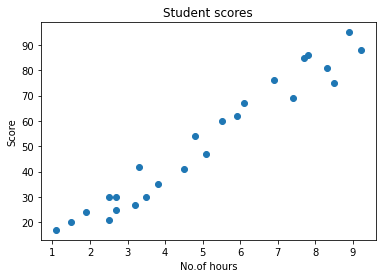

In [4]:
import matplotlib.pyplot as plt

Xax=student.iloc[:,0]
Yax=student.iloc[:,1]
plt.scatter(Xax,Yax)
plt.xlabel("No.of hours")
plt.ylabel("Score")
plt.title("Student scores")
plt.show()

In [5]:
#Perform the simple linear regression model
#Equation: Y=w0+w1.x
#Here Y(marks)=w0+w1.x
#Create x as hours and Y as marks

X = student.iloc[:, :-1]
y = student.iloc[:, 1]
print(X)

    Hours
0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8


In [6]:
print(y)

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train)

    Hours
2     3.2
7     5.5
17    1.9
22    3.8
24    7.8
5     1.5
3     8.5
11    5.9
15    8.9
13    3.3
19    7.4
21    4.8
14    1.1
16    2.5
8     8.3
18    6.1
10    7.7
6     9.2
12    4.5
0     2.5


In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)

4.047982479426587


In [9]:
print(regressor.coef_)

[9.55977347]


In [10]:
y_pred = regressor.predict(X_test)
for(i,j) in zip(y_test,y_pred):
    if i!=j:
        print("Actual value :",i,"Predicted value :",j)
print("Number of mislabeled points from test data set :", (y_test != y_pred).sum())

Actual value : 30 Predicted value : 29.859370852136973
Actual value : 25 Predicted value : 29.859370852136973
Actual value : 76 Predicted value : 70.01041943190867
Actual value : 30 Predicted value : 37.50718962923634
Actual value : 47 Predicted value : 52.802827183435085
Number of mislabeled points from test data set : 5


In [11]:
from sklearn import metrics
print("Mean Absolute error :", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared error :", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared error :", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute error : 4.859919476152551
Mean Squared error : 29.90780729352224
Root Mean Squared error : 5.468803095150002


[0 1 2 3 4]


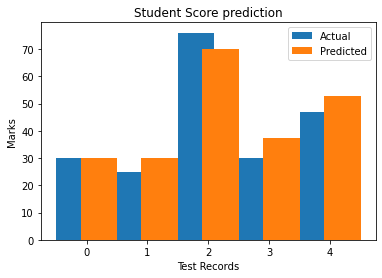

In [12]:
import matplotlib.pyplot as plt
c=X_test['Hours'].count()
xax=np.arange(c)
print(xax)
X_axis = np.arange(len(xax))
plt.bar(X_axis-0.2, y_test, 0.6, label='Actual')
plt.bar(X_axis+0.2, y_pred, 0.6, label='Predicted')

plt.xlabel("Test Records")
plt.ylabel("Marks")
plt.title("Student Score prediction")
plt.legend()
plt.show()

In [ ]:
#multiple linear regression for the data sets ‘student_score.csv’ and ‘company_data .csv’ respectively 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
advertising = pd.read_csv('Company_data.csv')
advertising.head()
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


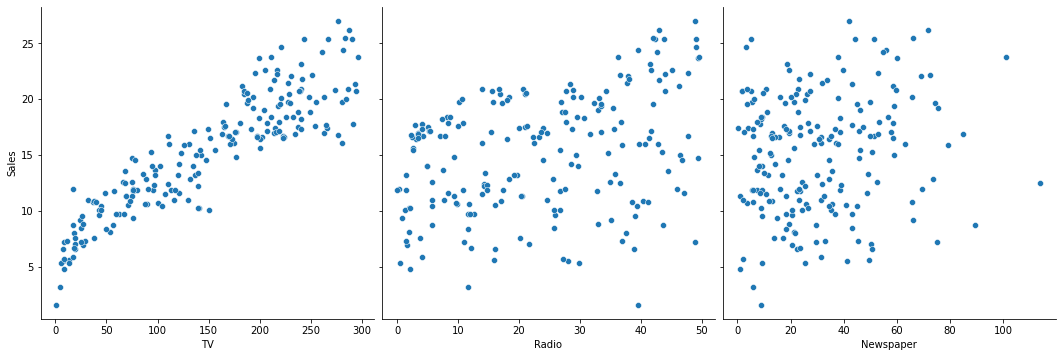

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(advertising, x_vars=['TV', 'Radio', 'Newspaper'],
            y_vars='Sales', height=5, aspect=1, kind='scatter')
plt.show()

In [16]:
#perform the multiple linear regression model
#Equation : Y=w0+w1.x1 + w2.x2 + w3.x3
#Here Y(sales)=w0+w1.x1(TV)+w2.x2(Radio)+w3.x3(Newspaper)
#create x and Y as sales

X = advertising.iloc[:, :-1]
print(X)
y = advertising.iloc[:, -1]
print(y)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]
0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train)

        TV  Radio  Newspaper
57   136.2   19.2       16.6
47   239.9   41.5       18.5
142  220.5   33.2       37.9
160  172.5   18.1       30.7
114   78.2   46.8       34.5
..     ...    ...        ...
133  219.8   33.5       45.1
79   116.0    7.7       23.1
105  137.9   46.4       59.0
37    74.7   49.4       45.7
159  131.7   18.4       34.6

[140 rows x 3 columns]


In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)

4.616225355202342


In [19]:
print(regressor.coef_)

[ 0.05249987  0.11989847 -0.00372604]


In [20]:
y_pred = regressor.predict(X_test)
for(i,j) in zip(y_test,y_pred):
    if i!=j:
        print("Actual value :",i,"Predicted value :",j)
print("Number of mislabeled points from test data set :", (y_test != y_pred).sum())

Actual value : 10.5 Predicted value : 10.089068941754741
Actual value : 8.7 Predicted value : 10.409928010359105
Actual value : 6.6 Predicted value : 7.470007526825693
Actual value : 20.9 Predicted value : 18.05023726366625
Actual value : 19.7 Predicted value : 16.476507858184032
Actual value : 22.6 Predicted value : 20.829411421167386
Actual value : 11.6 Predicted value : 11.794398151095262
Actual value : 5.7 Predicted value : 8.310637875511851
Actual value : 11.9 Predicted value : 9.852512513703076
Actual value : 18.0 Predicted value : 17.584644513325795
Actual value : 19.8 Predicted value : 18.252661436026045
Actual value : 10.1 Predicted value : 9.979593417477101
Actual value : 18.4 Predicted value : 19.18029993982934
Actual value : 25.4 Predicted value : 23.09415427477506
Actual value : 19.8 Predicted value : 20.457925311989655
Actual value : 16.7 Predicted value : 15.920338961328051
Actual value : 13.7 Predicted value : 10.619363239859979
Actual value : 9.7 Predicted value : 9.02

In [21]:
from sklearn import metrics
print("Mean Absolute error :", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared error :", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared error :", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute error : 1.3404778956322139
Mean Squared error : 3.6020197869535497
Root Mean Squared error : 1.8978987820622968


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]


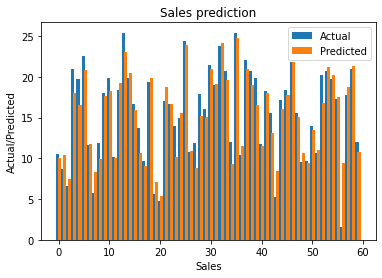

In [22]:
import matplotlib.pyplot as plt
c=X_test['TV'].count()
xax=np.arange(c)
print(xax)
X_axis = np.arange(len(xax))
plt.bar(X_axis-0.2, y_test, 0.6, label='Actual')
plt.bar(X_axis+0.2, y_pred, 0.6, label='Predicted')

plt.xlabel("Sales")
plt.ylabel("Actual/Predicted")
plt.title("Sales prediction")
plt.legend()
plt.show()